# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import urllib3
from pprint import pprint
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f'Number of cities in the list: {len(cities)}')

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
# 'https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}'
url = 'https://api.openweathermap.org/data/2.5/weather?q='
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print('Beginning Data Retrieval     ')
print('-----------------------------')

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    units = 'metric'
    city_url = f'{url}{city}&appid={weather_api_key}&units={units}'

    # Confirm request went through
    try:
        weather_response = requests.get(city_url)
        weather_response.raise_for_status()
    except:
        print(f'{city.title()} not found. Skipping...')
        continue
        
    # Log the url, record, and set numbers
    print('Processing Record %s of Set %s | %s' % (record_count, set_count, city.title()))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = weather_response.json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({'City': city,
                          'Lat': city_lat,
                          'Lng': city_lng,
                          'Max Temp': city_max_temp,
                          'Humidity': city_humidity,
                          'Cloudiness': city_clouds,
                          'Wind Speed': city_wind,
                          'Country': city_country,
                          'Date': city_date})

    # If an error is experienced, skip the city
    except:
        print(f'{city.title()} not found. Skipping...')
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print('-----------------------------')
print('Data Retrieval Complete      ')
print('-----------------------------')

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | Tiksi
Processing Record 2 of Set 1 | Port Saint John'S
Processing Record 3 of Set 1 | Punta Arenas
Processing Record 4 of Set 1 | Wailua Homesteads
Processing Record 5 of Set 1 | Blackmans Bay
Processing Record 6 of Set 1 | Grytviken
Processing Record 7 of Set 1 | Whitehorse
Processing Record 8 of Set 1 | Edinburgh Of The Seven Seas
Processing Record 9 of Set 1 | Yellowknife
Taiohae not found. Skipping...
Processing Record 10 of Set 1 | Albany
Processing Record 11 of Set 1 | Margaret River
Processing Record 12 of Set 1 | Thompson
Processing Record 13 of Set 1 | Vilyuysk
Processing Record 14 of Set 1 | Waitangi
Processing Record 15 of Set 1 | Bredasdorp
Processing Record 16 of Set 1 | Puerto Ayora
Processing Record 17 of Set 1 | Anadyr
Processing Record 18 of Set 1 | Port Elizabeth
Processing Record 19 of Set 1 | Invercargill
Processing Record 20 of Set 1 | Adamstown
Processing Record 21 of Set 1 

In [11]:
len(city_data)

578

In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data) 
city_data_df

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,2.08,86,99,2.80,RU,1724787733
1,port saint john's,-31.6229,29.5448,21.18,57,0,8.51,ZA,1724787734
2,punta arenas,-53.1500,-70.9167,8.06,61,75,9.77,CL,1724787454
3,wailua homesteads,22.0669,-159.3780,27.44,74,75,5.66,US,1724787736
4,blackmans bay,-43.0167,147.3167,8.07,89,99,0.89,AU,1724787738


In [19]:
# Reformat date
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit='s')

# Create date var for later use
date = city_data_df.loc[0, 'Date'].date().strftime('%Y-%m-%d')

In [21]:
# Export the City_Data into a csv
city_data_df.to_csv('output_data/cities.csv', index_label='City_ID')

In [23]:
# Read saved data
city_data_df = pd.read_csv('output_data/cities.csv', index_col='City_ID')

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,2.08,86,99,2.80,RU,2024-08-27 19:42:13
1,port saint john's,-31.6229,29.5448,21.18,57,0,8.51,ZA,2024-08-27 19:42:14
2,punta arenas,-53.1500,-70.9167,8.06,61,75,9.77,CL,2024-08-27 19:37:34
3,wailua homesteads,22.0669,-159.3780,27.44,74,75,5.66,US,2024-08-27 19:42:16
4,blackmans bay,-43.0167,147.3167,8.07,89,99,0.89,AU,2024-08-27 19:42:18


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

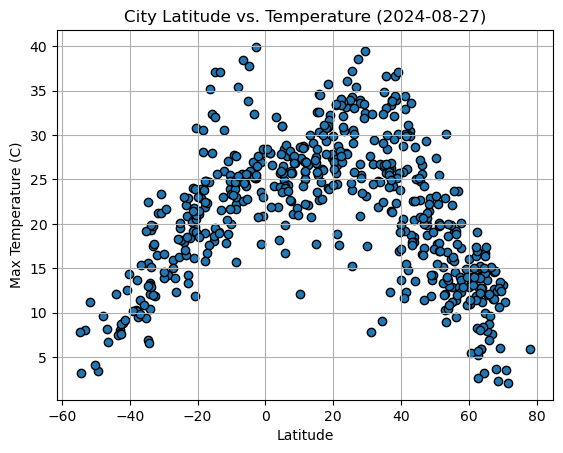

In [26]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df['Lat']
max_temp = city_data_df['Max Temp']
plt.scatter(lat, max_temp, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f'City Latitude vs. Temperature ({date})')
plt.grid(True)

# Save the figure
plt.savefig('output_data/Fig1.png')

# Show plot
plt.show()

#### Latitude Vs. Humidity

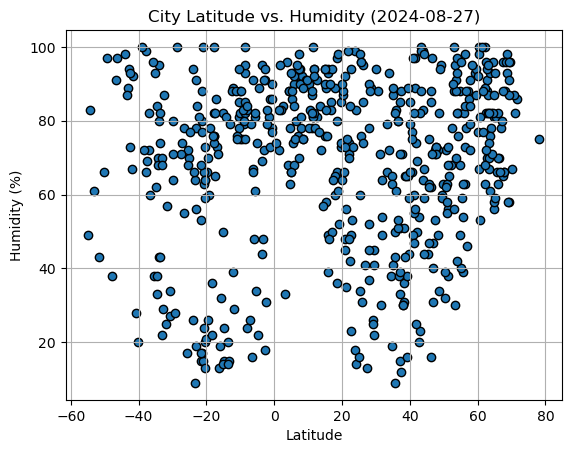

In [29]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df['Humidity']
plt.scatter(lat, humidity, edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({date})')
plt.grid(True)

# Save the figure
plt.savefig('output_data/Fig2.png')

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

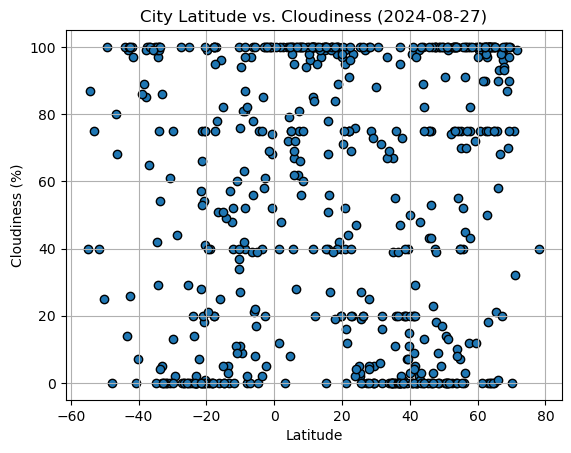

In [32]:
# Build the scatter plots for latitude vs. cloudiness
cloud = city_data_df['Cloudiness']
plt.scatter(lat, cloud, edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({date})')
plt.grid(True)

# Save the figure
plt.savefig('output_data/Fig3.png')

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

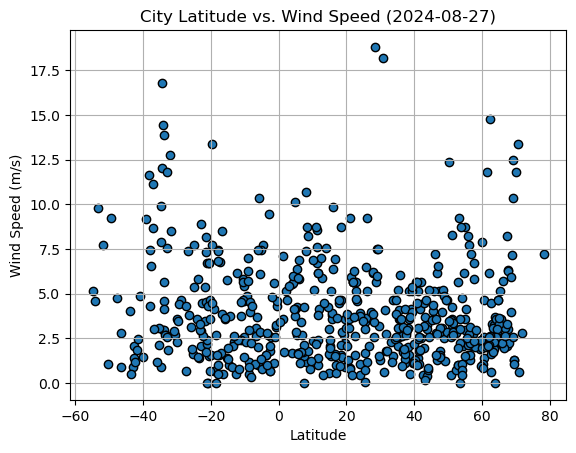

In [35]:
# Build the scatter plots for latitude vs. wind speed
wind = city_data_df['Wind Speed']
plt.scatter(lat, wind, edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'City Latitude vs. Wind Speed ({date})')
plt.grid(True)

# Save the figure
plt.savefig('output_data/Fig4.png')

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
# Define a function to create Linear Regression plots
def linreg_plot(x_values, y_values):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values[1], y_values[1])
    regress_values = x_values[1] * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

    x_quantile = np.percentile(x_values[1], [1])
    if slope > 0:
        y_quantile = np.percentile(y_values[1], [99])
    else:    
        y_quantile = np.percentile(y_values[1], [1])
        
    print(f'The r^2-value is: {rvalue**2}')

    plt.scatter(x_values[1],y_values[1], color='#a345f5', marker = '+')
    plt.plot(x_values[1],regress_values,color='#ff8800')
    plt.annotate(line_eq,(x_quantile, y_quantile),fontsize=18,color='black',weight='bold')
    plt.title(f'{x_values[0]} vs {y_values[0]}')
    plt.xlabel(x_values[0])
    plt.ylabel(y_values[0])
    plt.show()

In [40]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0), :]

# Display sample data
northern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,2.08,86,99,2.80,RU,2024-08-27 19:42:13
3,wailua homesteads,22.0669,-159.3780,27.44,74,75,5.66,US,2024-08-27 19:42:16
6,whitehorse,60.7161,-135.0538,13.43,53,75,4.63,CA,2024-08-27 19:42:20
8,yellowknife,62.4560,-114.3525,19.12,82,75,2.57,CA,2024-08-27 19:40:39
9,albany,42.6001,-73.9662,30.51,54,2,0.45,US,2024-08-27 19:38:46
...,...,...,...,...,...,...,...,...,...
569,dan khun thot,15.2085,101.7714,25.81,83,100,1.93,TH,2024-08-27 19:53:38
571,krasnokholm,51.5979,54.1567,16.90,65,0,2.70,RU,2024-08-27 19:53:40
575,napanee,44.2501,-76.9494,28.65,44,13,5.21,CA,2024-08-27 19:53:45


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0), :]

# Display sample data
southern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port saint john's,-31.6229,29.5448,21.18,57,0,8.51,ZA,2024-08-27 19:42:14
2,punta arenas,-53.1500,-70.9167,8.06,61,75,9.77,CL,2024-08-27 19:37:34
4,blackmans bay,-43.0167,147.3167,8.07,89,99,0.89,AU,2024-08-27 19:42:18
5,grytviken,-54.2811,-36.5092,3.25,83,87,4.61,GS,2024-08-27 19:42:19
7,edinburgh of the seven seas,-37.0676,-12.3116,11.47,72,100,11.12,SH,2024-08-27 19:40:22
...,...,...,...,...,...,...,...,...,...
566,buala,-8.1450,159.5921,25.44,84,82,2.22,SB,2024-08-27 19:53:35
570,maintirano,-18.0667,44.0167,23.86,76,0,1.54,MG,2024-08-27 19:53:39
572,itapecuru mirim,-3.3925,-44.3586,32.41,48,85,2.82,BR,2024-08-27 19:53:42


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.46860927584444756


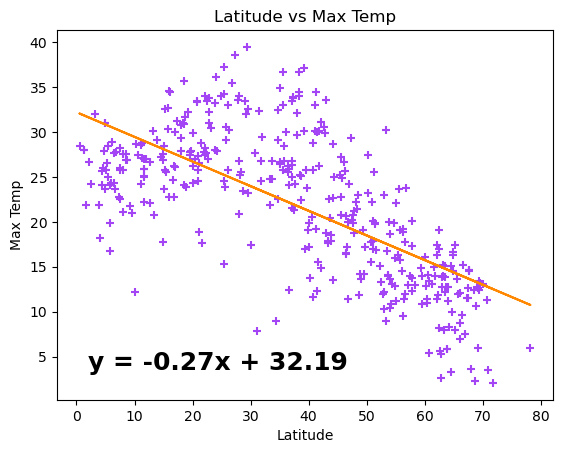

In [45]:
# Linear regression on Northern Hemisphere
north_lat = ['Latitude', northern_hemi_df['Lat']]
north_temp = ['Max Temp', northern_hemi_df['Max Temp']]
linreg_plot(north_lat, north_temp)

The r^2-value is: 0.6341747773008529


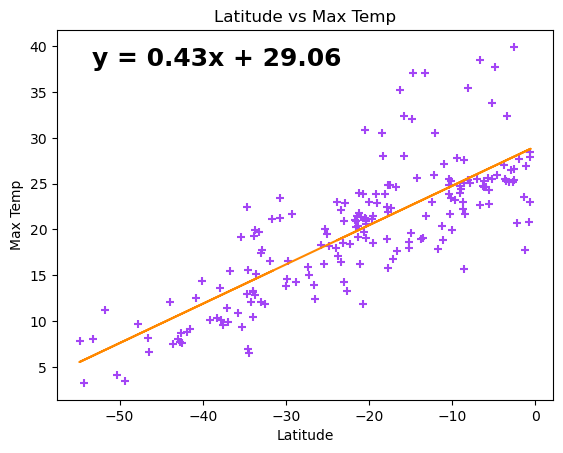

In [47]:
# Linear regression on Southern Hemisphere
south_lat = ['Latitude', southern_hemi_df['Lat']]
south_temp = ['Max Temp', southern_hemi_df['Max Temp']]
linreg_plot(south_lat, south_temp)

**Discussion about the linear relationship:** Here we are modelling the relationship between latitude and high temperatures in the northern and southern hemispheres. As the latitude's magnitude increases, the further away from the equator the latitude line is. As the magnitude of the latitude increases, the temperature decreases; this is to be expected since the weather at the equator is generally the hottest while the weather at the north and south poles are arctic. The r<sup>2</sup> values for the northern and southern hemispheres are .48 and .65, respectively. This tells us that about 48% of the temperature variance in the northern hemisphere can be explained by the latitude, and 65% of the temperature variance in the southern hemisphere is explained by the latitude. Other factors that may influence temperature could be elevation and the distance from large bodies of water.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 5.1333714804322415e-06


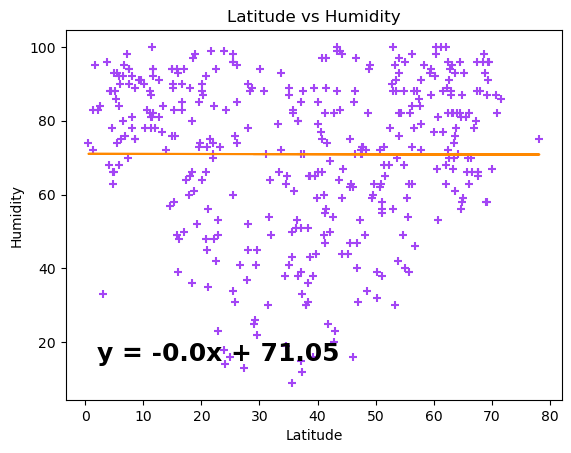

In [51]:
# Northern Hemisphere
north_hum = ['Humidity', northern_hemi_df['Humidity']]
linreg_plot(north_lat, north_hum)

The r^2-value is: 6.571055179771026e-05


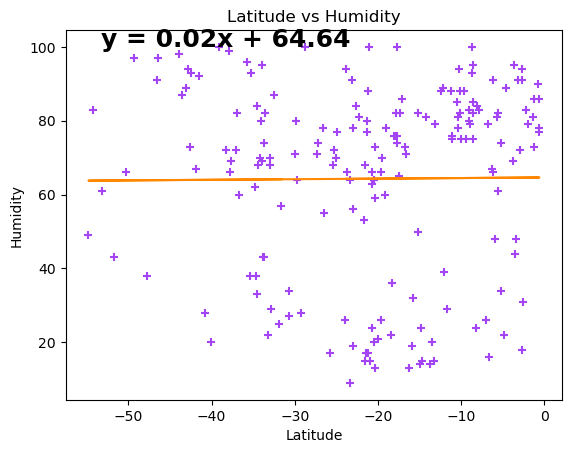

In [53]:
# Southern Hemisphere
south_hum = ['Humidity', southern_hemi_df['Humidity']]
linreg_plot(south_lat, south_hum)

**Discussion about the linear relationship:** These scatter plots show the relationship between latitude and humidity for the northern and southern hemispheres. The linear relationship between latitude and humidity appears to be very weak. This is evidenced by r<sup>2</sup> values of .00009 and .0001 for the northern hemisphere and southern hempisheres, respectively. This means that <1% of the variance in humidity can be explained by latitude. The expected outcome was a moderately strong correlation between the two variables. Other variables that be more influencial on the humidity could be water temperature, and air movement.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.0020011803693092264


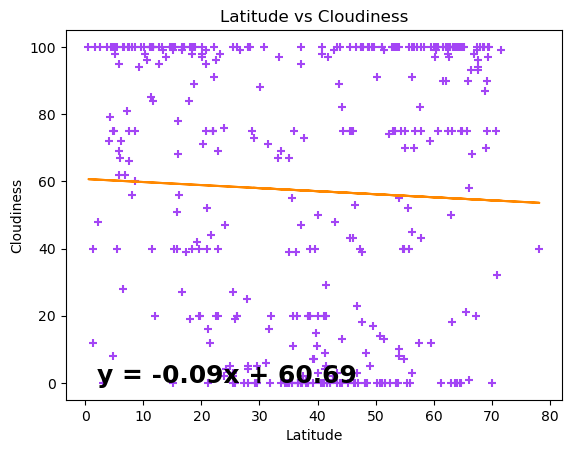

In [57]:
# Northern Hemisphere
north_cloud = ['Cloudiness', northern_hemi_df['Cloudiness']]
linreg_plot(north_lat, north_cloud)

The r^2-value is: 0.0024482607539329055


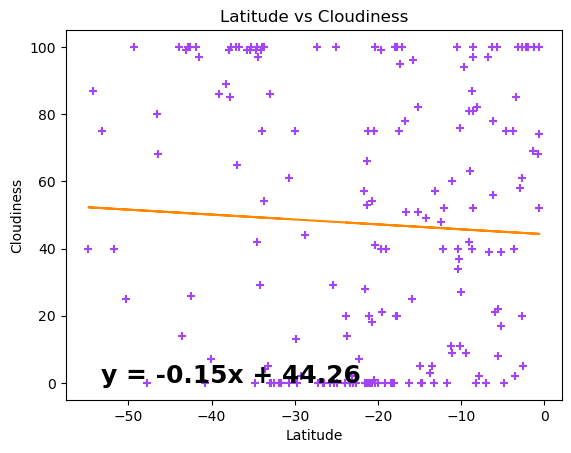

In [59]:
# Southern Hemisphere
south_cloud = ['Cloudiness', southern_hemi_df['Cloudiness']]
linreg_plot(south_lat, south_cloud)

**Discussion about the linear relationship:** These linear regression plots show the relationship between cloudiness and latitude in the northern and southern hemispheres. Latitude clearly has little to no affect on cloudiness. Both the northern and southern hemispheres have low r<sup>2</sup> values which are .01 and .006, respectively. This indicates that the variability in cloudiness must be better explained by its relationship to another variable. A better indicator of cloudiness could be humidity or wind currents.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0017196938460642985


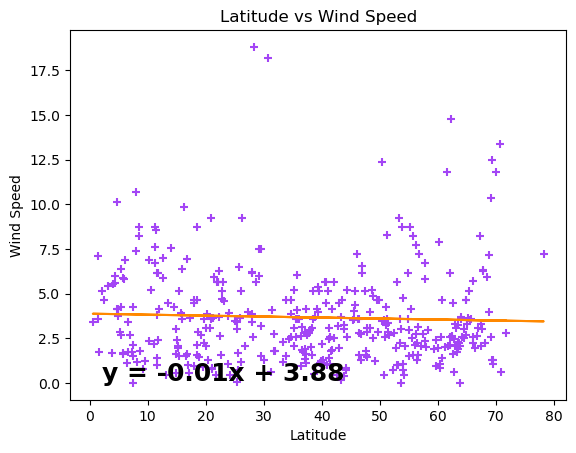

In [63]:
# Northern Hemisphere
north_wind = ['Wind Speed', northern_hemi_df['Wind Speed']]
linreg_plot(north_lat, north_wind)

The r^2-value is: 0.04840295524387112


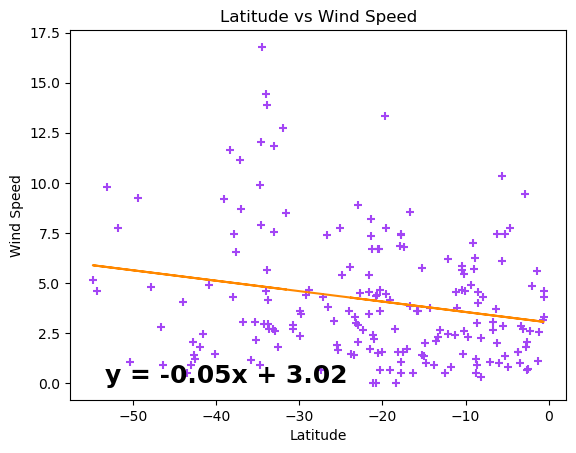

In [65]:
# Southern Hemisphere
south_wind = ['Wind Speed', southern_hemi_df['Wind Speed']]
linreg_plot(south_lat, south_wind)

**Discussion about the linear relationship:** These linear regression plots show the relationship between latitude and wind speed in the northern and southern hemispheres. The r<sup>2</sup> values for the northern and southern hemispheres are .002 and .04, respectively. This indicates that only .02% of the variation in wind speed can be explained by latitude in the northern hemisphere and 4% of the variation in wind speed can be explained by latitude in the southern hemisphere. Other variables that may better explain this variation could be air pressure, or other variables that have not been recorded in this project.